In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import librosa

In [5]:
sr = 44100
T = 1
N = int(sr*T)
n = arange(N)
t = n/sr

f = 100

x = sin(t*2*pi*f)
x = tanh(x*10)

(0.0, 0.1)

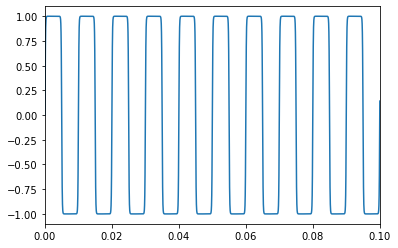

In [7]:
plot(t, x)
xlim([0, 0.1])

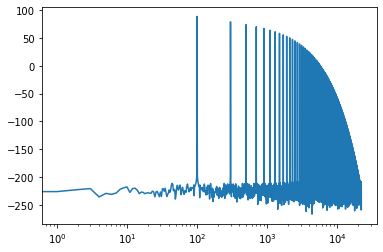

In [8]:
semilogx(20*log10(abs(fft.rfft(x))))

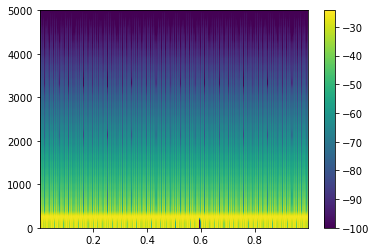

In [15]:
specgram(x, Fs=sr, vmin=-100)
ylim([0,5000])
colorbar()
show()

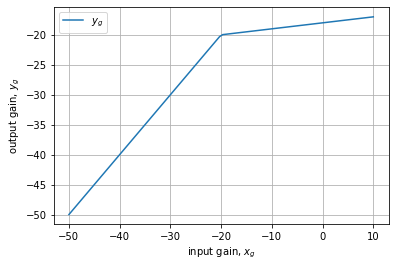

In [53]:
def gainComp(xg, thresh=-20, ratio=10,width=0):
    yg = zeros_like(xg)
    for i in range(len(xg)):
        threshDiff = xg[i]-thresh 
        if 2*(threshDiff)<-width:
            yg[i] = xg[i]
        elif 2*abs(threshDiff) <= width:
            yg[i] = xg[i] + (1/ratio-1)*(threshDiff + width/2)**2 / (2*width)
        elif 2*threshDiff>width:
            yg[i] = thresh + threshDiff/ratio
    return yg


xg = linspace(-50, 10, 100)
yg = gainComp(xg)#zeros_like(xg)

plot(xg,yg, label='$y_g$')
grid()
xlabel('input gain, $x_g$')
ylabel('output gain, $y_g$')


legend()

In [54]:
# width = 0
# thresh = -20

# ratio = 10

# xg = linspace(-50, 10, 100)
# yg = zeros_like(xg)

# for i in range(len(xg)):
#     threshDiff = xg[i]-thresh 
#     if 2*(threshDiff)<-width:
#         yg[i] = xg[i]
#     elif 2*abs(threshDiff) <= width:
#         yg[i] = xg[i] + (1/ratio-1)*(threshDiff + width/2)**2 / (2*width)
#     elif 2*threshDiff>width:
#         yg[i] = thresh + threshDiff/ratio


# # plot(yg, label='$y_g$')
# # plot(xg, label='$x_g$')

# plot(xg,yg, label='$y_g$')
# grid()
# xlabel('input gain, $x_g$')
# ylabel('output gain, $y_g$')


# legend()


0.999546588083036


Text(0.5, 0, 'time [s]')

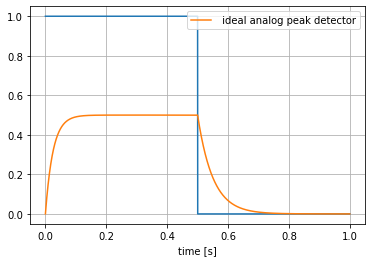

In [55]:
x = zeros(N)
x[0:N//2] = 1
y = zeros_like(x)

tau_a = 0.0500
tau_r = 0.0500

tauToAlpha = lambda tau: exp(-1/(sr*tau))

a_a = tauToAlpha(tau_a)#exp(-1/sr*tau_a)
a_r = tauToAlpha(tau_r)#0.9999
print(a_a)
for i in range(len(x)):
    y[i] = a_r*y[i-1] + (1 - a_a)*max(x[i] - y[i-1], 0 )



plot(t,x)
plot(t,y, label=' ideal analog peak detector')
grid()
legend()
xlabel('time [s]')

In [58]:
ls data/

drumLoop.wav*


0.999546588083036


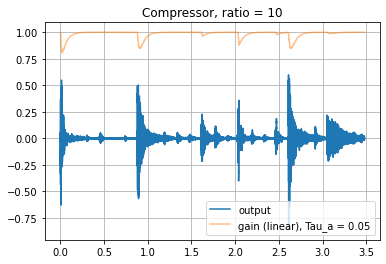

In [73]:
# x = zeros(N)
# x[0:N//2] = 1

x,sr = librosa.load('data/drumLoop.wav', sr=sr)
N = len(x)
n = arange(N)
t = n/sr

y = zeros_like(x)

inputSig = x

makeUp = 0


x = abs(x)
xdb = 20*log10(maximum(x,0.00001))
yg = gainComp(xdb)
afterSub = xdb - yg
x = afterSub

tau_a = 0.0500
tau_r = 0.0500

tauToAlpha = lambda tau: exp(-1/(sr*tau))

a_a = tauToAlpha(tau_a)#exp(-1/sr*tau_a)
a_r = tauToAlpha(tau_r)#0.9999
print(a_a)
for i in range(len(x)):
    y[i] = a_r*y[i-1] + (1 - a_a)*max(x[i] - y[i-1], 0 )

preLin = makeUp - y
lin = 10**(preLin/20)

outputSig = inputSig * lin

plot(t, outputSig,  label='output')
# plot(t, inputSig, label='input')
plot(t, lin, label='gain (linear), Tau_a = {}'.format(tau_a), alpha=0.5)
title("Compressor, ratio = {}".format(ratio) )
grid()
legend()   


In [63]:
lin

array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)

In [66]:
log10(0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-inf